In [43]:
import pandas as pd
import nltk
import re as re
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('dataset/Dataset 11000 Reviews.csv', on_bad_lines='skip',encoding="ISO-8859-1", header=None)
df.head(20)
df.columns =['comments']
df=df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True)
df['without_punctuation']=df['comments'].str.replace(r'[^A-Za-z\s]+', '')
df['Result'] = df['without_punctuation'].str[:3]
df['without_punctuation'] = df['without_punctuation'].str[3:]
df.tail(5)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.


,comments,without_punctuation,Result
9219,posÂ oppo f1s 64gb boht acha set hy mehngi meh...,oppo fs gb boht acha set hy mehngi mehngi set...,pos
9220,posÂ camra b kamal ka haiÂ,camra b kamal ka hai,pos
9221,posÂ is mobile may tamam features honay k sath...,is mobile may tamam features honay k sath sat...,pos
9222,posÂ v i p set hy btry timing kmal hy .,v i p set hy btry timing kmal hy,pos
9223,posâ â â 100 episodesâ â â mukammal ker...,episodes mukammal kerliye is lya bohat ...,pos


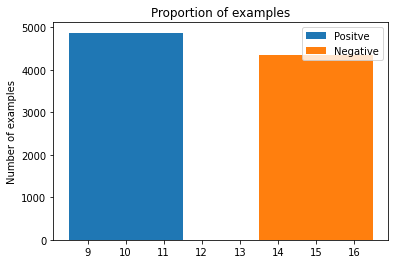

In [44]:
Pos = df[df['Result'] == 'pos'].shape[0]
Neg = df[df['Result'] == 'neg'].shape[0]

plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")

plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()


In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')


stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']

stop_extended =  stopwords
df['without_stop_words'] = df['without_punctuation'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_extended]))

df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comments,without_punctuation,Result,without_stop_words
0,ï»¿neg ab achanak khawaja saad rafique ko khiy...,ab achanak khawaja saad rafique ko khiyaal aa...,neg,achanak khawaja saad rafique khiyaal aagaya bh...
1,neg choor kasuri choor jhootay ka moo kaala,choor kasuri choor jhootay ka moo kaala,neg,choor kasuri choor jhootay moo kaala
2,neg gali gali mein shor hai gaaanjaaaa shair c...,gali gali mein shor hai gaaanjaaaa shair chor...,neg,gali gali mein shor gaaanjaaaa shair chor
3,neg hum kia aur hamari logic kia bhonkoon k mu...,hum kia aur hamari logic kia bhonkoon k muted...,neg,kia hamari logic kia bhonkoon k muted bhonk an...
4,neg imran khan altaf hussain chachoo haroon ab...,imran khan altaf hussain chachoo haroon ab sa...,neg,imran khan altaf hussain chachoo haroon sadmey...
5,neg lagta ha sab bhonkay hath xaray kar rahay ...,lagta ha sab bhonkay hath xaray kar rahay hei...,neg,lagta ha sab bhonkay hath xaray hein k panama ...
6,neg merey bahi tum saye kaha rahey hoo but mai...,merey bahi tum saye kaha rahey hoo but main t...,neg,merey bahi tum saye kaha rahey hoo but tum ku ...
7,neg nawaz khanzaaney ka moun khul chukaa hai s...,nawaz khanzaaney ka moun khul chukaa hai sab ...,neg,nawaz khanzaaney moun khul chukaa sab kha rahy
8,neg pakistan mai samsung ke jo models new avai...,pakistan mai samsung ke jo models new availab...,neg,pakistan mai samsung ke models new available s...
9,neg sharifoon ko tau pehley b baray galeez gal...,sharifoon ko tau pehley b baray galeez galain...,neg,sharifoon tau pehley b baray galeez galain det...


In [46]:
#Tokenization
import nltk
nltk.download('punkt')
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['without_stop_words']), axis=1)


df['text_string'] = df['tokenized'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in df['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
df['text_string_fdist'] = df['tokenized'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))


#Lemantization
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,comments,without_punctuation,Result,without_stop_words,tokenized,text_string,text_string_fdist,text_string_lem
0,ï»¿neg ab achanak khawaja saad rafique ko khiy...,ab achanak khawaja saad rafique ko khiyaal aa...,neg,achanak khawaja saad rafique khiyaal aagaya bh...,"[achanak, khawaja, saad, rafique, khiyaal, aag...",achanak khawaja saad rafique khiyaal aagaya bh...,achanak khawaja saad rafique khiyaal aagaya bh...,achanak khawaja saad rafique khiyaal aagaya bh...
1,neg choor kasuri choor jhootay ka moo kaala,choor kasuri choor jhootay ka moo kaala,neg,choor kasuri choor jhootay moo kaala,"[choor, kasuri, choor, jhootay, moo, kaala]",choor kasuri choor jhootay moo kaala,choor kasuri choor jhootay moo kaala,choor kasuri choor jhootay moo kaala
2,neg gali gali mein shor hai gaaanjaaaa shair c...,gali gali mein shor hai gaaanjaaaa shair chor...,neg,gali gali mein shor gaaanjaaaa shair chor,"[gali, gali, mein, shor, gaaanjaaaa, shair, chor]",gali gali mein shor gaaanjaaaa shair chor,gali gali mein shor gaaanjaaaa shair chor,gali gali mein shor gaaanjaaaa shair chor
3,neg hum kia aur hamari logic kia bhonkoon k mu...,hum kia aur hamari logic kia bhonkoon k muted...,neg,kia hamari logic kia bhonkoon k muted bhonk an...,"[kia, hamari, logic, kia, bhonkoon, k, muted, ...",kia hamari logic kia bhonkoon muted bhonk anda...,kia hamari logic kia bhonkoon muted bhonk anda...,kia hamari logic kia bhonkoon muted bhonk anda...
4,neg imran khan altaf hussain chachoo haroon ab...,imran khan altaf hussain chachoo haroon ab sa...,neg,imran khan altaf hussain chachoo haroon sadmey...,"[imran, khan, altaf, hussain, chachoo, haroon,...",imran khan altaf hussain chachoo haroon sadmey...,imran khan altaf hussain chachoo haroon sadmey...,imran khan altaf hussain chachoo haroon sadmey...


In [47]:

X=df['text_string']

y =df['Result']

df2 = pd.DataFrame().assign(tweet=df['text_string'], output=df['Result'])

df2.head()

train, test = train_test_split(df2, test_size = 0.2, stratify = df2['output'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape


((7379, 2), (1845, 2))

In [48]:
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=stop_extended)

# fit the object with the training data tweets
tfidf_vectorizer.fit(train.tweet)

TfidfVectorizer(max_features=1000,
                stop_words=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha',
                            'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh',
                            'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr',
                            'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya',
                            'gaya', ...])

In [49]:
train_idf = tfidf_vectorizer.transform(train.tweet)
test_idf  = tfidf_vectorizer.transform(test.tweet)

In [50]:
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, train.output)

# predict the label on the traning data
predict_train = model_LR.predict(train_idf)

# predict the model on the test data
predict_test = model_LR.predict(test_idf)

print (f1_score(y_true= train.output, y_pred= predict_train,average="binary", pos_label="pos"))

print (f1_score(y_true= test.output, y_pred= predict_test,average="binary", pos_label="pos"))


0.843159922928709
0.7697063369397218


In [51]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= stop_extended)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.tweet, train.output)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=['ai', 'ayi', 'hy', 'hai', 'main',
                                             'ki', 'tha', 'koi', 'ko', 'sy',
                                             'woh', 'bhi', 'aur', 'wo', 'yeh',
                                             'rha', 'hota', 'ho', 'ga', 'ka',
                                             'le', 'lye', 'kr', 'kar', 'lye',
                                             'liye', 'hotay', 'waisay', 'gya',
                                             'gaya', ...])),
                ('model', LogisticRegression())])

In [52]:
text = ["oppo nahi lena"]

# predict the label using the pipeline
pipeline.predict(text)

array(['neg'], dtype=object)

In [53]:
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']